# Импорт

Импорт библиотек, ctrl c + ctrl v.

In [170]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler # Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder # Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder # Импортируем Порядковое кодированиеот scikit-learn

from sklearn.pipeline import Pipeline # Pipeline. Ни добавить, ни убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

# Набор данных

Будем изучать датасет фильмов (уже в процессе работы заметила, что строк данных немного меньше 1000, но буду надеяться, что это не критично).

In [171]:
df = pd.read_csv('https://raw.githubusercontent.com/reisanar/datasets/refs/heads/master/HollywoodMovies.csv', delimiter = ',')
df

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
0,Spider-Man 3,Sony,61.0,54.0,Metamorphosis,Action,4252.0,151.10,35540.0,336.53,554.34,890.87,258.0,345.30,58.57,2007
1,Shrek the Third,Paramount,42.0,57.0,Quest,Animation,4122.0,121.60,29507.0,322.72,476.24,798.96,160.0,499.35,76.00,2007
2,Transformers,Paramount,57.0,89.0,Monster Force,Action,4011.0,70.50,17577.0,319.25,390.46,709.71,150.0,473.14,47.00,2007
3,Pirates of the Caribbean: At World's End,Disney,45.0,74.0,Rescue,Action,4362.0,114.70,26302.0,309.42,654.00,963.42,300.0,321.14,38.23,2007
4,Harry Potter and the Order of the Phoenix,Warner Bros,78.0,82.0,Quest,Adventure,4285.0,77.10,17998.0,292.00,647.88,939.89,150.0,626.59,51.40,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,The Canyons,IFC,22.0,NaN,NaN,NaN,1.0,0.01,13351.0,0.06,0.14,0.19,NaN,77.21,NaN,2013
966,The Call,TriStar,43.0,66.0,NaN,NaN,2507.0,17.12,6828.0,51.87,16.70,68.57,13.0,527.48,131.69,2013
967,The English Teacher,Cinedigm Entertainment,42.0,NaN,NaN,NaN,2.0,0.01,3001.0,0.10,0.06,0.10,NaN,NaN,NaN,2013
968,John Dies at the End,Magnolia,61.0,53.0,NaN,NaN,1.0,0.01,12467.0,0.14,NaN,0.14,1.0,14.20,1.00,2013


# Разведка

Сразу на берегу выкинем столбцы с различными сборами, кроме мировых. Избавимся также со столбцом с видом истории, так как все это рассматривать мы не будем.

In [172]:
df = df.drop(columns = ['Story', 'DomesticGross', 'ForeignGross', 'OpenProfit', 'TheatersOpenWeek', 'BOAvgOpenWeekend', 'OpeningWeekend', 'Profitability'])

Далее подробнее посмотрим, что у нас вообще имеется.

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Movie           970 non-null    object 
 1   LeadStudio      961 non-null    object 
 2   RottenTomatoes  913 non-null    float64
 3   AudienceScore   907 non-null    float64
 4   Genre           691 non-null    object 
 5   WorldGross      914 non-null    float64
 6   Budget          897 non-null    float64
 7   Year            970 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 60.8+ KB


Видим наличие пустых значений в некоторых местах, избавимся от них.

In [174]:
drop_list = df[(df.Genre.isnull()) | (df.LeadStudio.isnull()) | (df.RottenTomatoes.isnull()) | (df.AudienceScore.isnull()) | (df.WorldGross.isnull())| (df.Budget.isnull())]
df = df.drop(drop_list.index)

df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Movie           655 non-null    object 
 1   LeadStudio      655 non-null    object 
 2   RottenTomatoes  655 non-null    float64
 3   AudienceScore   655 non-null    float64
 4   Genre           655 non-null    object 
 5   WorldGross      655 non-null    float64
 6   Budget          655 non-null    float64
 7   Year            655 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 41.1+ KB


В итоге получаем жалкие 600+ строк данных. Проверимся еще и на дубликаты.

In [175]:
df.duplicated().sum()

0

Ура, чисто. Теперь выведем какие столбцы у нас категориальные, а какие числовые.

In [176]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))
print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['Movie', 'LeadStudio', 'Genre'] 
 Число столблцов =  3
Числовые данные:	  ['RottenTomatoes', 'AudienceScore', 'WorldGross', 'Budget', 'Year'] 
 Число столблцов =  5


# Анализ числовых признаков

In [177]:
df.describe()

,RottenTomatoes,AudienceScore,WorldGross,Budget,Year
count,655.000000,655.000000,655.000000,655.000000,655.000000
mean,50.222901,60.751145,169.363287,55.773435,2009.268702
std,26.890634,16.732398,229.631454,52.000784,1.469729
min,0.000000,19.000000,1.100000,0.000000,2007.000000
25%,27.000000,48.000000,40.455000,20.000000,2008.000000
50%,50.000000,61.000000,86.870000,37.000000,2009.000000
75%,73.000000,73.000000,201.415000,75.000000,2010.000000
max,99.000000,96.000000,2781.500000,300.000000,2013.000000


Рассмотрим гистограммы по числовым значениям.

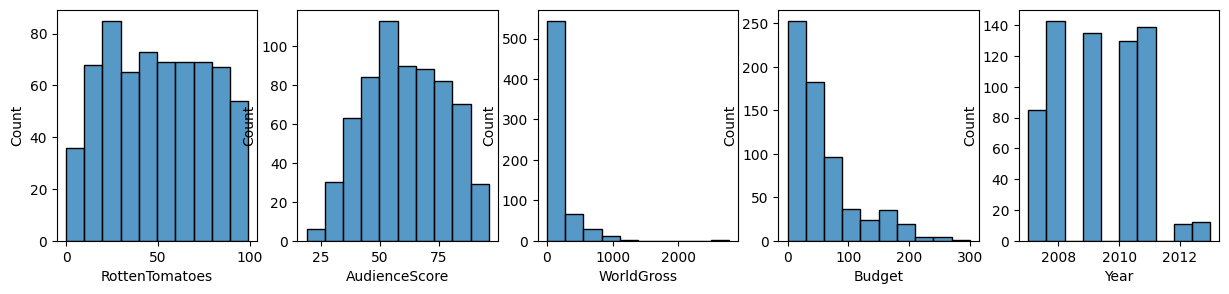

In [178]:
width = 5
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(15,3))

for idx, column_name in enumerate(num_columns):
    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name,
            bins = 10);

Все достаточно прилично, хоть и столбцы с WorldGross/Budget выглядят несколько подозрительно. Взглянем на них поближе, в обычном и лог. масштабе.

## WorldGross

*Обычный масштаб.*

<Axes: xlabel='WorldGross', ylabel='Count'>

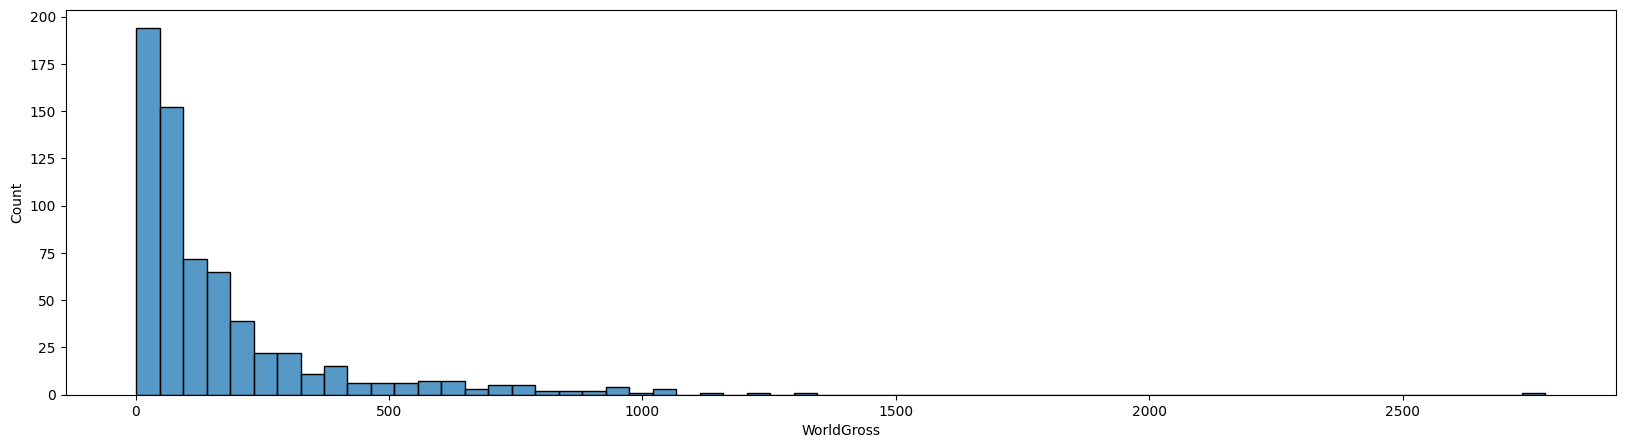

In [179]:
plt.figure(figsize=(20,5))
sns.histplot(data=df,
             x='WorldGross',
             bins = 60)

*Логарифмический.*

<Axes: xlabel='WorldGross', ylabel='Count'>

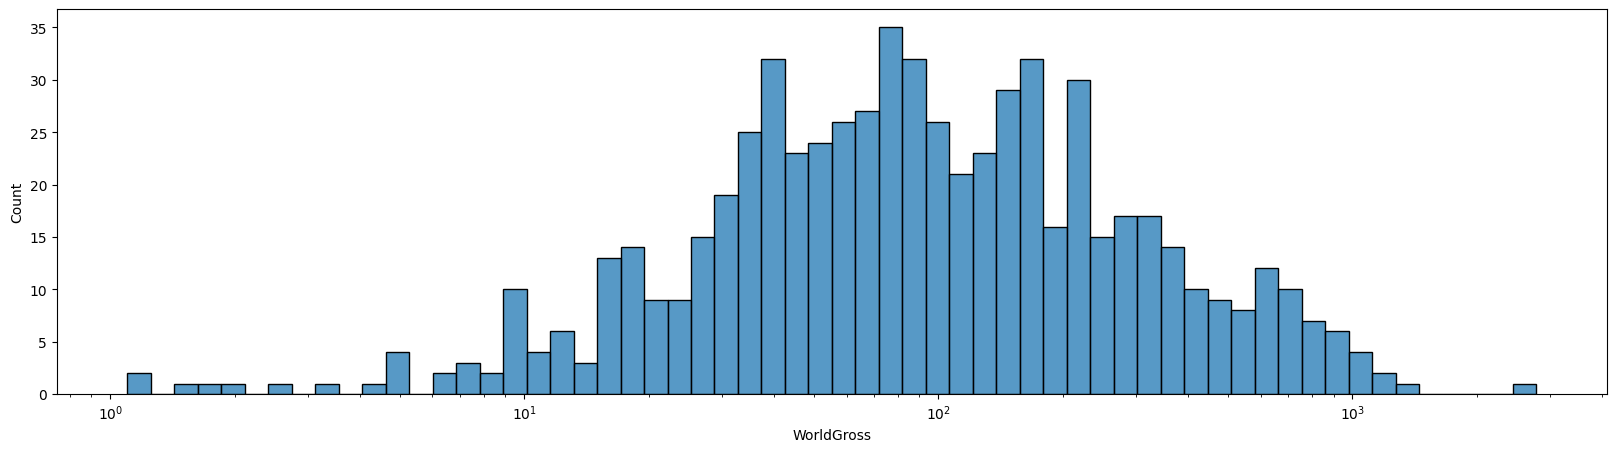

In [180]:
plt.figure(figsize=(20,5))
sns.histplot(data=df,
             x='WorldGross',
             bins = 60,
             log_scale = True)

Попробуем удалить записи, где чистая прибыль меньше 10 или более 1000.

In [181]:
drop_list = df[(df.WorldGross > 1000) | (df.WorldGross < 10)]
df = df.drop(drop_list.index)
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Movie           620 non-null    object 
 1   LeadStudio      620 non-null    object 
 2   RottenTomatoes  620 non-null    float64
 3   AudienceScore   620 non-null    float64
 4   Genre           620 non-null    object 
 5   WorldGross      620 non-null    float64
 6   Budget          620 non-null    float64
 7   Year            620 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 38.9+ KB


## Budget

*Обычный масштаб.*

<Axes: xlabel='Budget', ylabel='Count'>

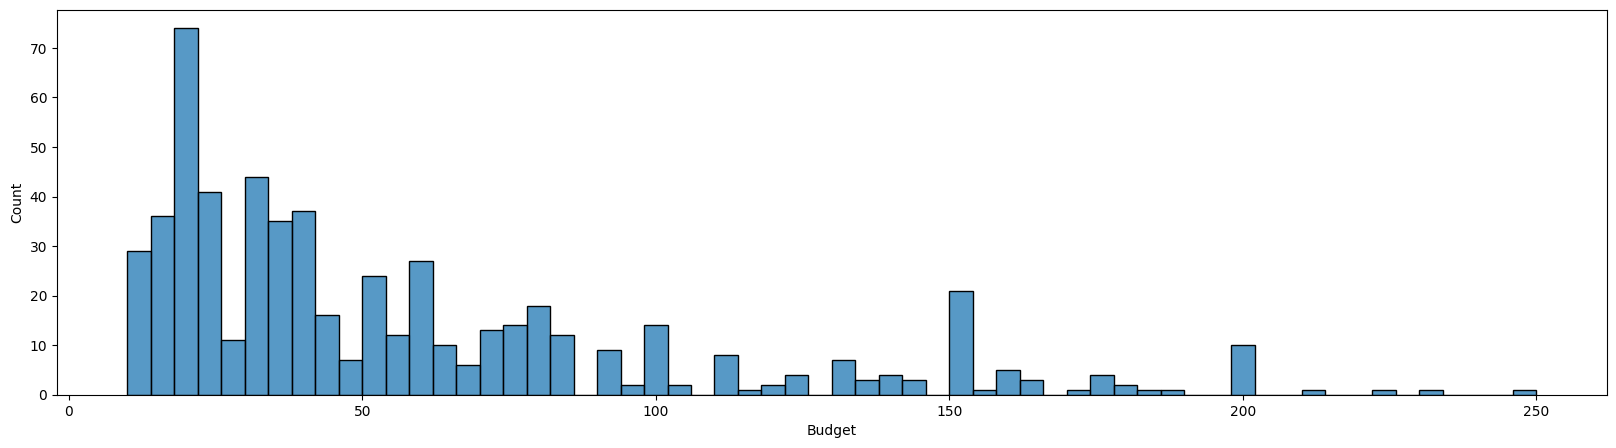

In [193]:
plt.figure(figsize=(20,5))
sns.histplot(data=df,
             x='Budget',
             bins = 60)

*Логарифмический.*

<Axes: xlabel='Budget', ylabel='Count'>

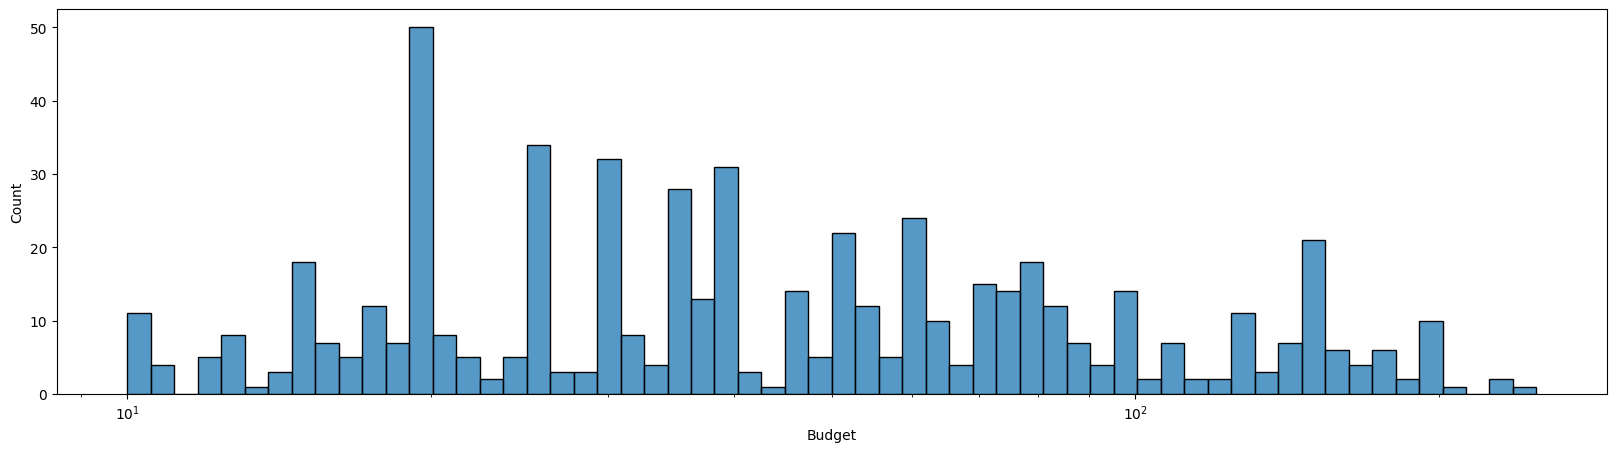

In [194]:
plt.figure(figsize=(20,5))
sns.histplot(data=df,
             x='Budget',
             bins = 60,
             log_scale = True)

Попробуем убрать данные со бюджетом менее 10 и более 250.

In [195]:
drop_list = df[(df.Budget > 250) | (df.Budget < 10)]
df = df.drop(drop_list.index)
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Movie           578 non-null    object 
 1   LeadStudio      578 non-null    object 
 2   RottenTomatoes  578 non-null    float64
 3   AudienceScore   578 non-null    float64
 4   Genre           578 non-null    object 
 5   WorldGross      578 non-null    float64
 6   Budget          578 non-null    float64
 7   Year            578 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 36.2+ KB


## Итог

Снова выведем гистограммы.

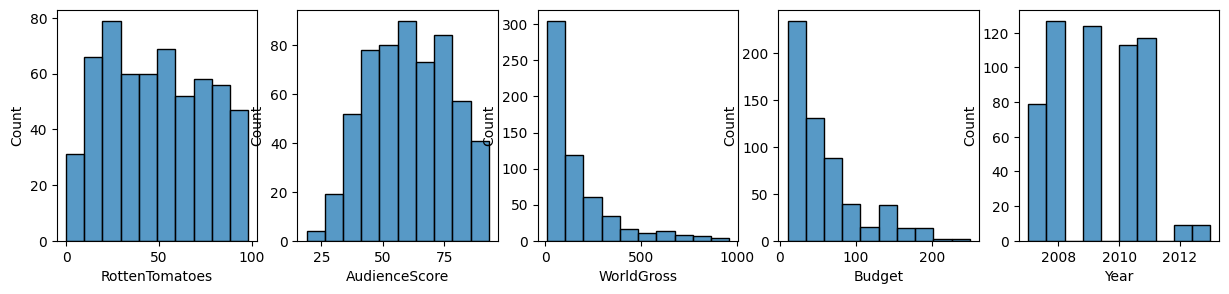

In [185]:
width = 5
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(15,3))

for idx, column_name in enumerate(num_columns):
    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name,
            bins = 10);

Результат выглядит немного приличнее.

## Скатерограммы

Посмотрим на влияние различных числовых данных (x) на мировые сборы (y), также сделаем цветовое разделение по жанрам фильмов.

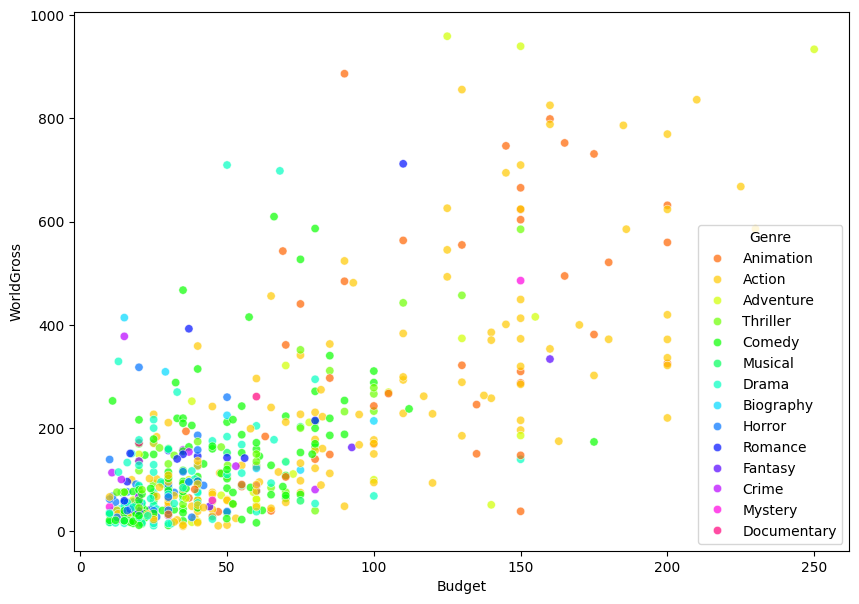

In [203]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x="Budget",
    y="WorldGross",
    hue="Genre",
    alpha = 0.7,
    palette='hsv'
    );

Можно заметить рост сборов в зависимости роста бюджета.

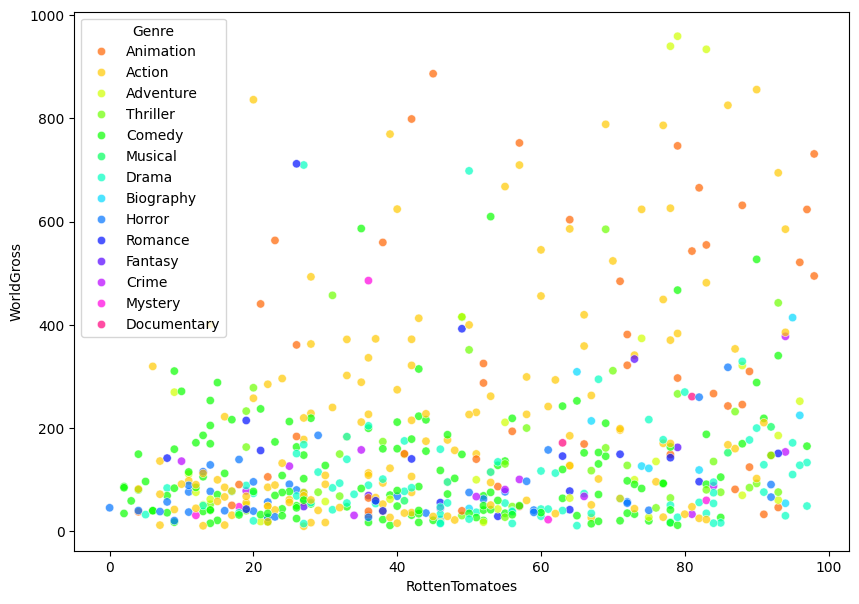

In [204]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x="RottenTomatoes",
    y="WorldGross",
    hue="Genre",
    alpha = 0.7,
    palette='hsv'
    );

Здесь какую-то интересную связь заметить сложно. Можно лишь отметить то, что оценки на томатах практически никак не влияют на сборы.

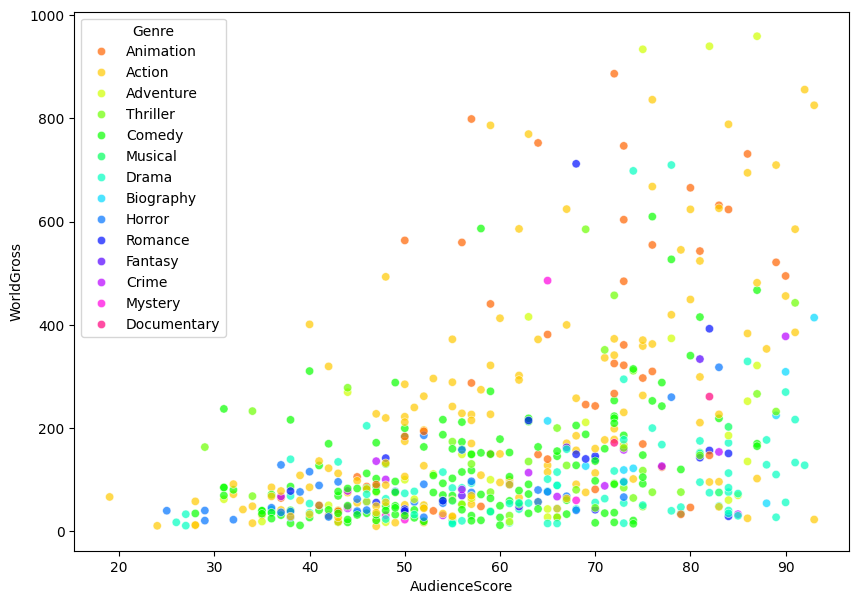

In [205]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x="AudienceScore",
    y="WorldGross",
    hue="Genre",
    alpha = 0.7,
    palette='hsv'
    );

Чем выше оценки аудитории, тем вероятнее, что фильм заработал много денег.

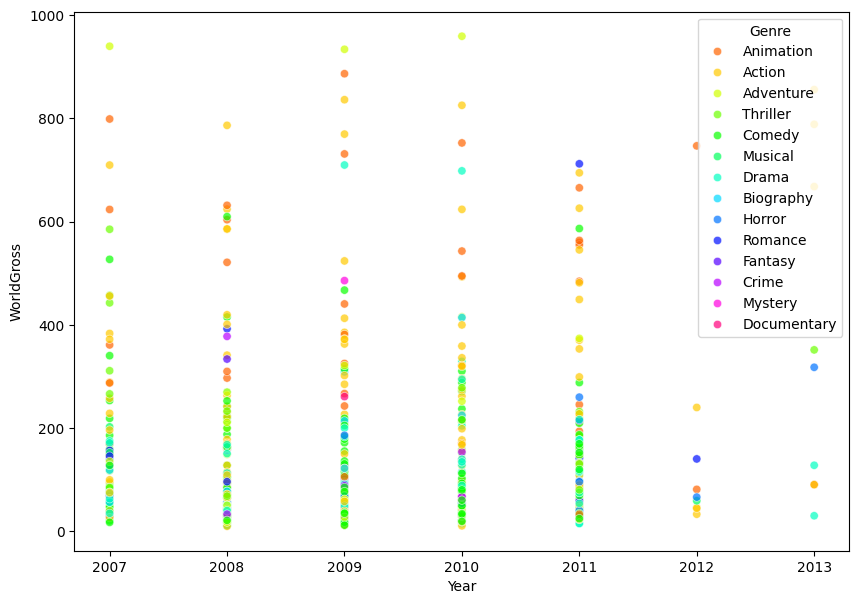

In [206]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x="Year",
    y="WorldGross",
    hue="Genre",
    alpha = 0.7,
    palette='hsv'
    );

Можно лишь отметить, что в 2012-2013 годах заметно меньше записей о фильмах, чем в предыдущих (предполагаю, что они пострадали в ходе нашей чистки). Также самые лучшие сборы практически ежегодно у экшен-фильмов.

## Гистограммы

Решила также посмотреть на взаимосвязь числовых данных и жанров фильмов (вышло довольно цветасто, так как недооценила количество жанров).

<Figure size 3000x3000 with 0 Axes>

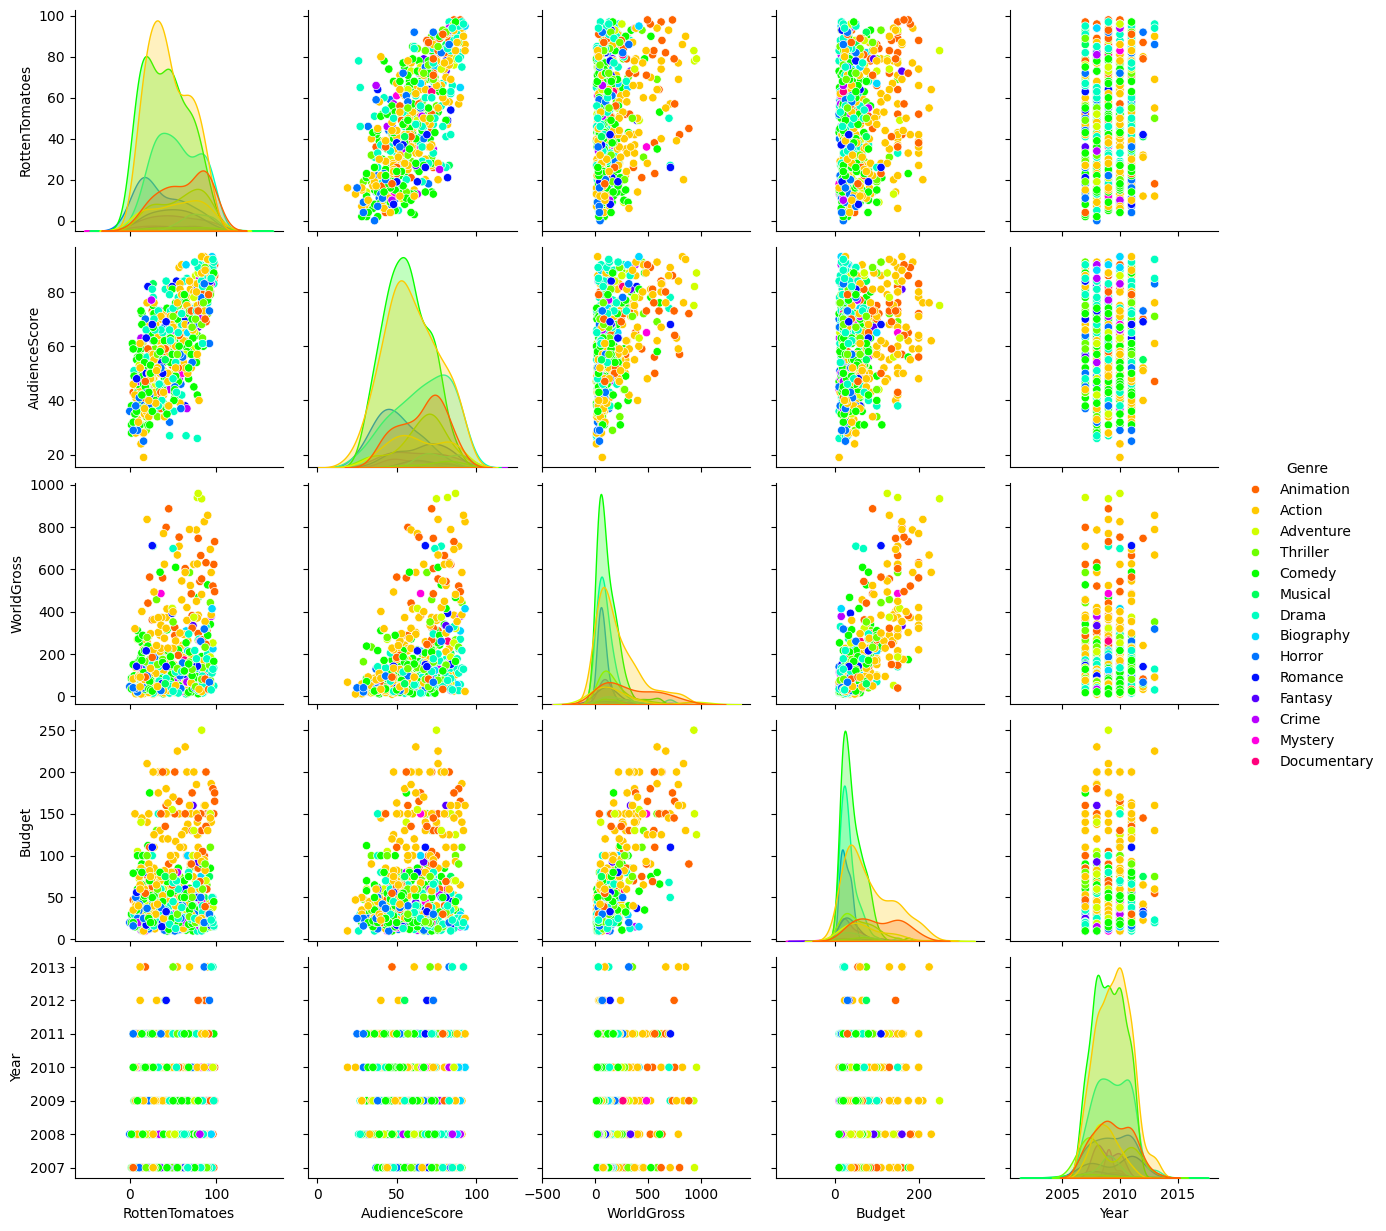

In [207]:
fig = plt.figure(figsize=(30,30))
sns.pairplot(data = df,
             hue ='Genre',
             palette = 'hsv',);

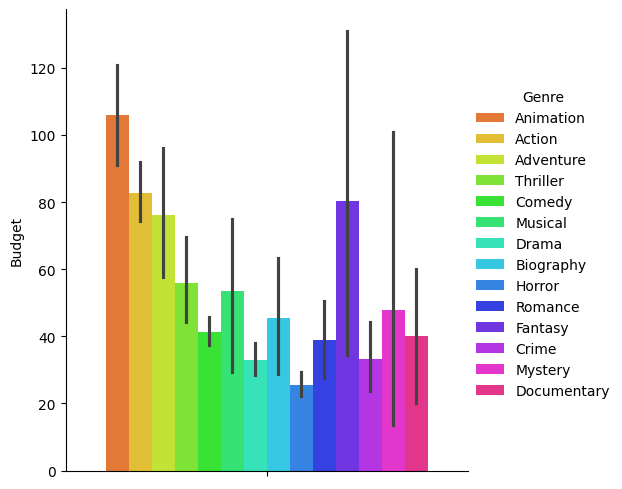

In [208]:
sns.catplot(y='Budget',
                data=df,
            kind = "bar",
            hue = 'Genre',
                alpha=0.9,
        palette=sns.color_palette("hsv", 14),
            aspect=1,
             );

Больше всего бюджета в среднем выделяют на анимации.

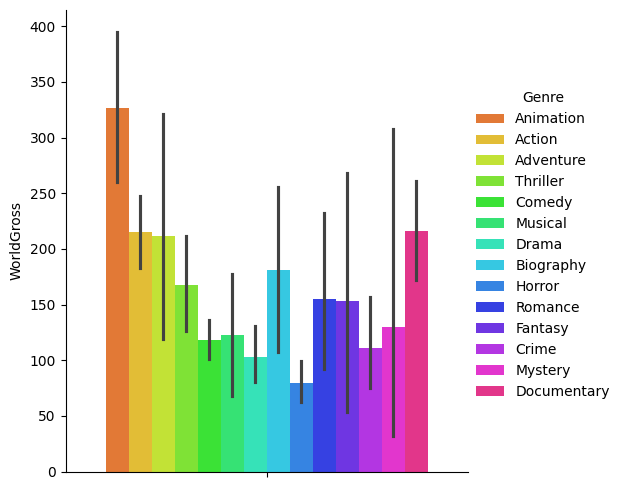

In [209]:
sns.catplot(y='WorldGross',
                data=df,
            kind = "bar",
            hue = 'Genre',
                alpha=0.9,
        palette=sns.color_palette("hsv", 14),
            aspect=1,
             );

И они же имеют лучшие сборы.

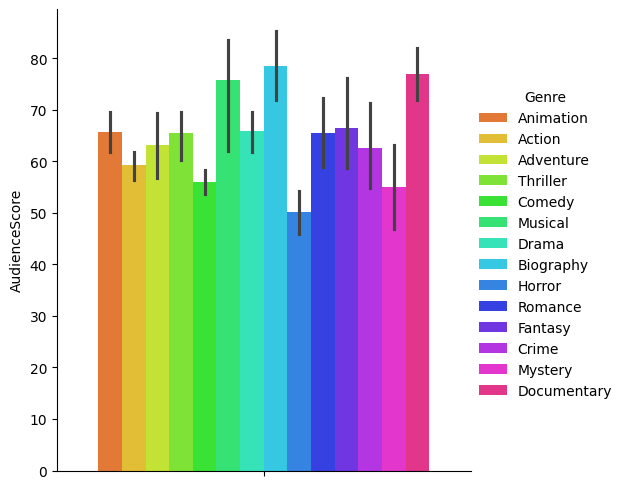

In [210]:
sns.catplot(y='AudienceScore',
                data=df,
            kind = "bar",
            hue = 'Genre',
                alpha=0.9,
        palette=sns.color_palette("hsv", 14),
            aspect=1,
             );

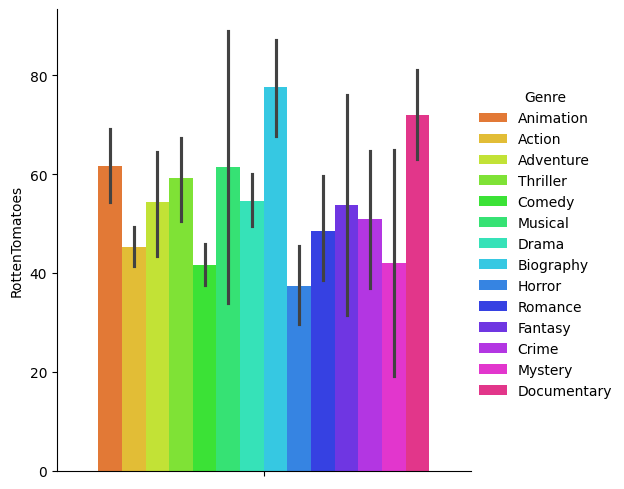

In [211]:
sns.catplot(y='RottenTomatoes',
                data=df,
            kind = "bar",
            hue = 'Genre',
                alpha=0.9,
        palette=sns.color_palette("hsv", 14),
            aspect=1,
             );

В оценках аудитории и томатов неожиданно лидируют биографии и документалки, так как здесь рассматривают медиану.

# Статистическая оценка признаков

In [212]:
df.describe()

,RottenTomatoes,AudienceScore,WorldGross,Budget,Year
count,578.000000,578.000000,578.000000,578.000000,578.000000
mean,48.743945,60.660900,165.909533,57.929066,2009.216263
std,26.524509,16.369411,179.300857,47.532601,1.455264
min,0.000000,19.000000,10.100000,10.000000,2007.000000
25%,26.000000,48.000000,48.243500,23.000000,2008.000000
50%,47.000000,60.000000,95.880000,40.000000,2009.000000
75%,72.000000,73.000000,211.670000,75.000000,2010.000000
max,98.000000,93.000000,959.300000,250.000000,2013.000000


Аггрегация по жанрам.

In [213]:
df.groupby(['Genre'],)[num_columns].agg( [('count'), ('max'), ('median'), ('min')])

RottenTomatoes                    AudienceScore               \
                     count   max median   min         count   max median   
Genre                                                                      
Action                 149  94.0   42.0   4.0           149  93.0   57.0   
Adventure               29  96.0   54.0   9.0            29  87.0   61.0   
Animation               48  98.0   65.0   4.0            48  90.0   70.0   
Biography                9  96.0   75.0  50.0             9  93.0   74.0   
Comedy                 142  97.0   41.0   2.0           142  87.0   55.5   
Crime                   15  94.0   51.0  10.0            15  90.0   63.0   
Documentary              2  81.0   72.0  63.0             2  82.0   77.0   
Drama                   81  97.0   53.0   5.0            81  92.0   67.0   
Fantasy                  4  79.0   54.5  27.0             4  81.0   64.5   
Horror                  39  92.0   26.0   0.0            39  83.0   49.0   
Musical                  4  92.0   63.5  27.0             4  84.0   82.0   
Mystery                  5  83.0   36.0  12.0             5  68.0   50.0   
Romance                 18  93.0   47.5   8.0            18  84.0   68.5   
Thriller                33  93.0   67.0  14.0            33  91.0   69.0   

                  WorldGross                             Budget         \
              min      count      max    median      min  count    max   
Genre                                                                    
Action       19.0        149  855.900  132.2700   10.100    149  230.0   
Adventure    31.0         29  959.300  100.0800   17.930     29  250.0   
Animation    37.0         48  886.680  277.3150   30.750     48  200.0   
Biography    65.0          9  414.204  126.5700   44.360      9  100.0   
Comedy       28.0        142  609.840   83.4725   11.770    142  175.0   
Crime        37.0         15  377.910   88.3000   31.150     15   80.0   
Documentary  72.0          2  261.190  216.4375  171.685      2   60.0   
Drama        26.0         81  709.820   73.2800   11.210     81  150.0   
Fantasy      56.0          4  333.930  116.1550   48.188      4  160.0   
Horror       25.0         39  318.000   62.6940   20.971     39   50.0   
Musical      55.0          4  202.550  114.0150   59.420      4   75.0   
Mystery      44.0          5  485.900   47.7000   22.830      5  150.0   
Romance      38.0         18  712.170  141.2550   29.370     18  110.0   
Thriller     29.0         33  585.350  130.7900   27.660     33  150.0   

                           Year                      
             median   min count   max  median   min  
Genre                                                
Action        65.00  10.0   149  2013  2009.0  2007  
Adventure     60.00  12.0    29  2011  2009.0  2007  
Animation    100.00  20.0    48  2013  2009.0  2007  
Biography     40.00  15.0     9  2010  2009.0  2007  
Comedy        35.00  10.0   142  2011  2009.0  2007  
Crime         30.00  10.8    15  2010  2009.0  2008  
Documentary   40.00  20.0     2  2010  2009.5  2009  
Drama         25.00  10.0    81  2013  2009.0  2007  
Fantasy       68.25  25.0     4  2010  2008.0  2007  
Horror        25.00  10.0    39  2013  2009.0  2007  
Musical       62.50  14.0     4  2012  2007.0  2007  
Mystery       20.00  10.0     5  2010  2009.0  2009  
Romance       34.00  15.0    18  2012  2011.0  2007  
Thriller      48.00  12.5    33  2013  2008.0  2007

Много строк у экшен-фильмов и комедий, зато документалки/фэнтези/мюзиклы/мистику обделили. Максимальные сборы/бюджеты имеют экшен-фильмы.

Аггрегация по студиям.

In [214]:
df.groupby(['LeadStudio'],)[num_columns].agg( [('count'), ('max'), ('median'), ('min')])

RottenTomatoes                    AudienceScore  \
                                  count   max median   min         count   
LeadStudio                                                                 
Aardman Animations                    1  92.0   92.0  92.0             1   
Buena Vista                           5  87.0   39.0   5.0             5   
CBS                                   4  41.0   23.5  19.0             4   
Columbia                              3  95.0   85.0  44.0             3   
Crest                                 1  17.0   17.0  17.0             1   
Disney                               32  98.0   54.0  14.0            32   
DreamWorks                            6  83.0   77.0  58.0             6   
FilmDistrict                          1  12.0   12.0  12.0             1   
Focus                                 5  83.0   67.0  57.0             5   
Fox                                  58  93.0   42.5   6.0            58   
Fox Searchlight                       1  96.0   96.0  96.0             1   
Happy Madison                         3  19.0   14.0   4.0             3   
Highlight Communications              1  24.0   24.0  24.0             1   
Independent                          98  97.0   41.5   2.0            98   
Legendary Pictures                    2  35.0   29.0  23.0             2   
Liberty Starz                         2  72.0   63.5  55.0             2   
Lionsgate                            26  92.0   40.0   2.0            26   
MGM                                   5  64.0   58.0  25.0             5   
Mediaplex                             1  27.0   27.0  27.0             1   
Miramax                               2  59.0   52.5  46.0             2   
Morgan Creek                          1   7.0    7.0   7.0             1   
New Line                              3  65.0   61.0  15.0             3   
Overture                              1  19.0   19.0  19.0             1   
Paramount                            61  98.0   66.0   6.0            61   
Pixar                                 1  38.0   38.0  38.0             1   
Regency Enterprises                   1  38.0   38.0  38.0             1   
Relativity Media                     19  90.0   36.0   9.0            19   
Screen Gems                           1  31.0   31.0  31.0             1   
Sony                                 53  96.0   39.0   5.0            53   
Spyglass Entertainment                3  71.0   49.0  23.0             3   
Summit                               21  92.0   46.0   8.0            21   
Universal                            54  94.0   58.5  12.0            54   
Vertigo                               1   4.0    4.0   4.0             1   
Village Roadshow                      1  41.0   41.0  41.0             1   
Virgin                                1  69.0   69.0  69.0             1   
Warner Bros                          83  94.0   49.0   0.0            83   
Weinstein                            16  97.0   66.0  15.0            16   

                                            WorldGross                     \
                           max median   min      count      max    median   
LeadStudio                                                                  
Aardman Animations        82.0   82.0  82.0          1  147.410  147.4100   
Buena Vista               70.0   50.0  42.0          5  122.430   96.7500   
CBS                       55.0   50.0  47.0          4   77.477   39.3980   
Columbia                  89.0   76.0  47.0          3  227.820  110.2000   
Crest                     41.0   41.0  41.0          1   50.507   50.5070   
Disney                    89.0   73.5  43.0         32  731.300  253.2650   
DreamWorks                91.0   78.0  68.0          6  746.920  427.1300   
FilmDistrict              52.0   52.0  52.0          1   44.810   44.8100   
Focus                     85.0   72.0  58.0          5   80.630   36.3400   
Fox                       88.0   58.0  28.0         58  886.

(И тут мне стало плохо). Объединим все студии, у которых меньше 30 фильмов.

In [215]:
counts = df.LeadStudio.value_counts()
rare =  counts[(counts.values < 30)]
df['LeadStudio'] = df['LeadStudio'].replace(rare.index.values, 'Others')
df.LeadStudio.value_counts()

,count
LeadStudio,
Others,139
Independent,98
Warner Bros,83
Paramount,61
Fox,58
Universal,54
Sony,53
Disney,32


In [216]:
df.groupby(['LeadStudio'],)[num_columns].agg( [('count'), ('max'), ('median'), ('min')])

RottenTomatoes                    AudienceScore               \
                     count   max median   min         count   max median   
LeadStudio                                                                 
Disney                  32  98.0   54.0  14.0            32  89.0   73.5   
Fox                     58  93.0   42.5   6.0            58  88.0   58.0   
Independent             98  97.0   41.5   2.0            98  93.0   56.0   
Others                 139  97.0   46.0   2.0           139  93.0   57.0   
Paramount               61  98.0   66.0   6.0            61  91.0   68.0   
Sony                    53  96.0   39.0   5.0            53  89.0   59.0   
Universal               54  94.0   58.5  12.0            54  91.0   62.5   
Warner Bros             83  94.0   49.0   0.0            83  93.0   61.0   

                  WorldGross                          Budget                \
              min      count     max    median    min  count    max median   
LeadStudio                                                                   
Disney       43.0         32  731.30  253.2650  17.63     32  200.0   95.0   
Fox          28.0         58  886.68  128.0560  12.34     58  155.0   45.0   
Independent  19.0         98  712.17   62.9570  11.77     98  170.0   25.5   
Others       25.0        139  855.90   75.4500  10.10    139  230.0   33.0   
Paramount    27.0         61  836.30  162.8400  11.21     61  210.0   62.0   
Sony         31.0         53  769.69  105.9600  16.00     53  200.0   40.0   
Universal    36.0         54  788.68   91.8185  18.41     54  200.0   60.0   
Warner Bros  24.0         83  959.30  140.0730  10.91     83  250.0   50.0   

                   Year                      
              min count   max  median   min  
LeadStudio                                   
Disney       11.0    32  2011  2009.0  2007  
Fox          11.0    58  2011  2009.0  2007  
Independent  10.0    98  2011  2009.0  2007  
Others       10.0   139  2013  2010.0  2007  
Paramount    13.5    61  2011  2009.0  2007  
Sony         10.0    53  2013  2009.0  2007  
Universal    10.0    54  2013  2009.0  2007  
Warner Bros  10.0    83  2013  2009.0  2007

Если смотреть средние числа, то лучшие сборы/бюджеты имеют Дисней. В противовес им стоит независимое кино.

## Корреляция

Смотрим корреляцию числовых данных.

In [218]:
cm = sns.color_palette("vlag", as_cmap=True)
df[num_columns].corr().style.background_gradient(cmap=cm,
                                                vmin = -1,
                                                vmax=1)

,RottenTomatoes,AudienceScore,WorldGross,Budget,Year
RottenTomatoes,1.000000,0.693598,0.246411,0.117153,0.060838
AudienceScore,0.693598,1.000000,0.425412,0.205875,-0.034020
WorldGross,0.246411,0.425412,1.000000,0.723180,0.047558
Budget,0.117153,0.205875,0.723180,1.000000,0.034667
Year,0.060838,-0.034020,0.047558,0.034667,1.000000


Есть корреляция у RottenTomatoes-AudienceScore, WorldGross-Budget, а также небольшая обратная корреляция AS-Year.

# Предварительная обработка числовых данных

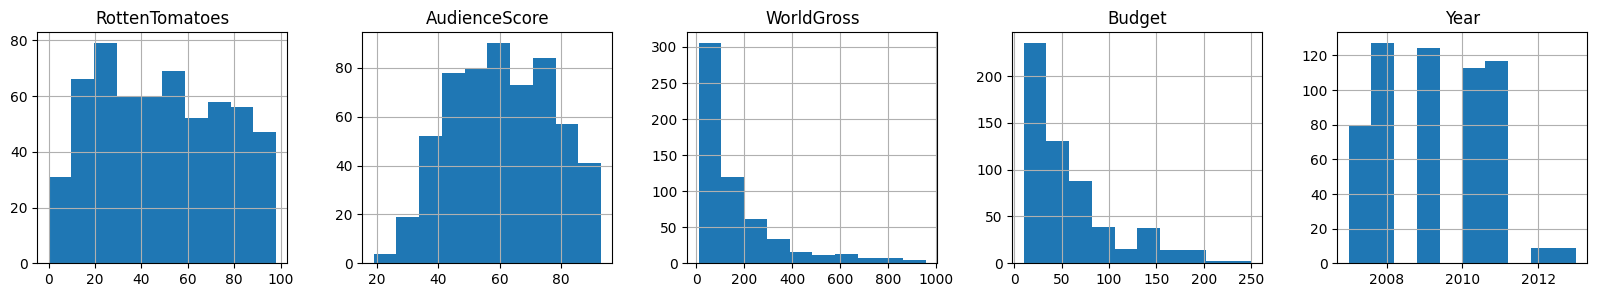

In [219]:
fig, axs = plt.subplots(1,5,figsize=(20,  3))
df.hist(column = num_columns, ax = axs );

Попробуем нелинейно преобразовать Budget и WorldGross. Остальное уже стандартизируем/нормируем.

## Стандартизация

In [220]:
scale = StandardScaler()
scale.fit(df[num_columns]);
scaled = scale.transform(df[num_columns])
df_standard = pd.DataFrame(scaled, columns= num_columns)
df_standard

,RottenTomatoes,AudienceScore,WorldGross,Budget,Year
0,-0.254474,-0.223836,3.533719,2.149248,-1.524247
1,0.311531,1.732723,3.035521,1.938684,-1.524247
2,1.103937,1.304725,4.320397,1.938684,-1.524247
3,0.764335,0.509873,2.341337,1.938684,-1.524247
4,1.669942,1.855007,1.545728,1.096427,-1.524247
...,...,...,...,...,...
573,1.405806,1.365868,0.848976,-0.798650,2.602286
574,1.783143,1.916150,-0.210608,-0.798650,2.602286
575,-1.160081,-0.835261,-0.419042,-0.061676,2.602286
576,-1.386483,0.020733,-0.420549,0.043606,2.602286


Визуализируем после стандартизации.

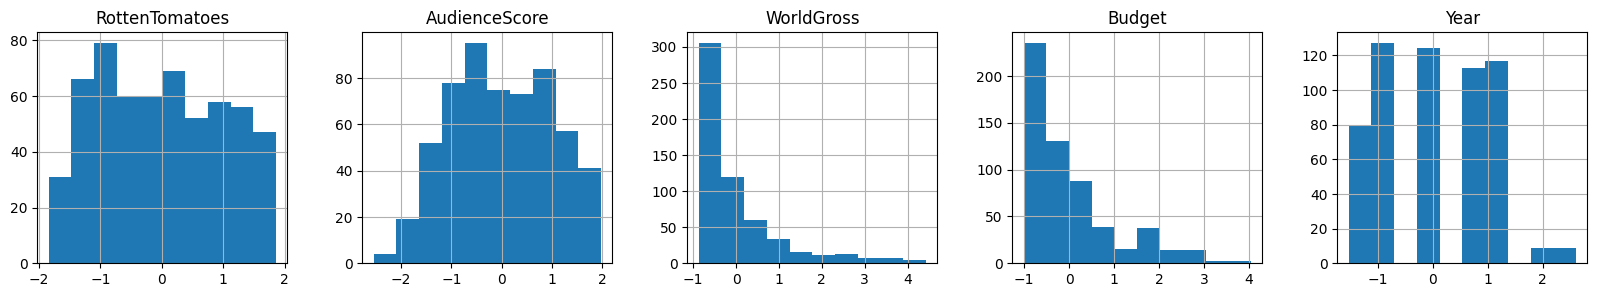

In [221]:
df_standard.hist(figsize = (20,3), layout= (1,5));

## Нормализация

In [222]:
norm = MinMaxScaler()
norm.fit(df[num_columns]);
normolized = norm.transform(df[num_columns])
df_norm = pd.DataFrame(normolized, columns= num_columns)
df_norm

,RottenTomatoes,AudienceScore,WorldGross,Budget,Year
0,0.428571,0.513514,0.831079,0.625000,0.0
1,0.581633,0.945946,0.737052,0.583333,0.0
2,0.795918,0.851351,0.979551,0.583333,0.0
3,0.704082,0.675676,0.606037,0.583333,0.0
4,0.948980,0.972973,0.455879,0.416667,0.0
...,...,...,...,...,...
573,0.877551,0.864865,0.324378,0.041667,1.0
574,0.979592,0.986486,0.124399,0.041667,1.0
575,0.183673,0.378378,0.085061,0.187500,1.0
576,0.122449,0.567568,0.084777,0.208333,1.0


Визуализируем после нормирования (или нормализации?).

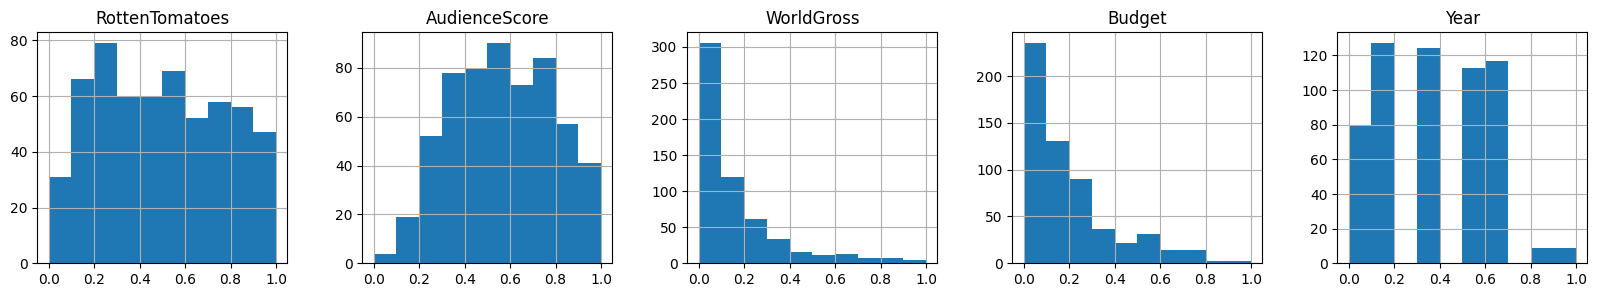

In [223]:
df_norm.hist(figsize = (20,3), layout= (1,5));

## Нелинейное преобразование

In [224]:
pt = PowerTransformer()
pt.fit(df[num_columns]);
power = pt.transform(df[num_columns])
df_power = pd.DataFrame(power, columns= num_columns)
df_power

,RottenTomatoes,AudienceScore,WorldGross,Budget,Year
0,-0.149498,-0.207884,1.996351,1.624983,-1.526366
1,0.389716,1.702167,1.888420,1.555071,-1.526366
2,1.071095,1.292251,2.143228,1.555071,-1.526366
3,0.787636,0.519950,1.711380,1.555071,-1.526366
4,1.520504,1.818595,1.451611,1.208850,-1.526366
...,...,...,...,...,...
573,1.314039,1.351049,1.138247,-1.009276,2.595236
574,1.607394,1.876698,0.249903,-1.009276,2.595236
575,-1.176623,-0.827838,-0.097325,0.371819,2.595236
576,-1.494467,0.036511,-0.100351,0.481790,2.595236


Визуализируем снова.

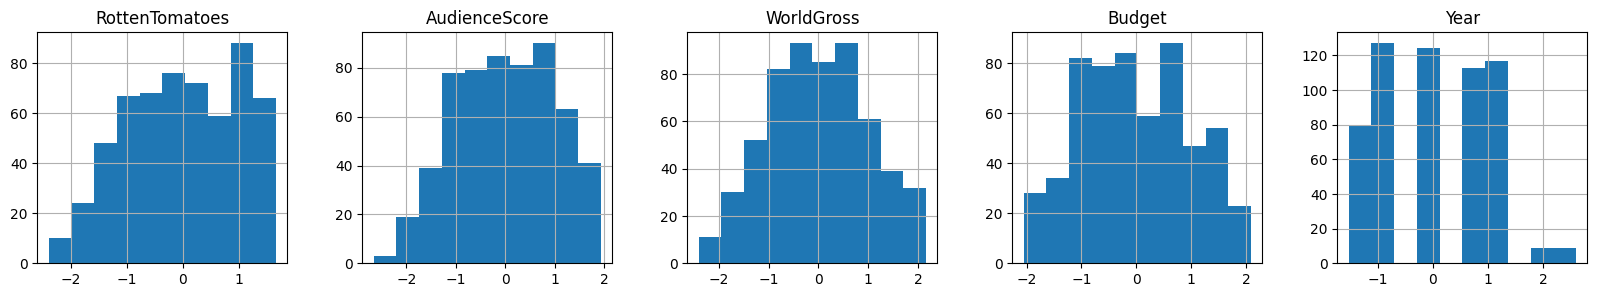

In [225]:
df_power.hist(figsize = (20,3), layout= (1,5));

# Предварительная обработка категориальных данных

In [131]:
ordinal = OrdinalEncoder()
ordinal.fit(df[cat_columns]);
Ordinal_encoded = ordinal.transform(df[cat_columns])
df_ordinal = pd.DataFrame(Ordinal_encoded, columns = cat_columns)
df_ordinal

,Movie,LeadStudio,Genre
0,372.0,4.0,2.0
1,521.0,4.0,0.0
2,175.0,7.0,1.0
3,189.0,7.0,13.0
4,416.0,6.0,13.0
...,...,...,...
573,424.0,7.0,9.0
574,2.0,3.0,7.0
575,139.0,3.0,2.0
576,475.0,5.0,0.0


## One-hot кодирование

In [226]:
ohe = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)
ohe.fit(df[cat_columns]);
ohe_feat = ohe.transform(df[cat_columns])
df_ohe = pd.DataFrame(ohe_feat, columns = ohe.get_feature_names_out()).astype(int)
df_ohe

,"Movie_10,000 B.C.",Movie_12 Rounds,Movie_12 years a slave,Movie_127 Hours,Movie_17 Again,Movie_2012,Movie_21,Movie_27 Dresses,Movie_30 Days of Night,Movie_30 Minutes or Less,...,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Thriller
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
574,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
575,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
576,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Табличка заметно разрослась из-за большого количества уникальных значений (а у нас все названия фильмов уникалные).

## Попытка уменьшить табличку (неудачная)



Хотела попробовать сделать кодировку без названий, чтобы уменьшить ширину таблицы.

In [227]:
df_oh = df # сделаем второй датафрейм, чтобы не портить основной
df_oh = df_oh.drop(columns = ['Movie']) # попробуем полностью убрать столбец с названиями

ohe = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)
ohe.fit(df_oh[df_oh.columns]);
ohe_feat = ohe.transform(df_oh[df_oh.columns])
df_ohe = pd.DataFrame(ohe_feat, columns = ohe.get_feature_names_out()).astype(int)
df_ohe

,LeadStudio_Disney,LeadStudio_Fox,LeadStudio_Independent,LeadStudio_Others,LeadStudio_Paramount,LeadStudio_Sony,LeadStudio_Universal,LeadStudio_Warner Bros,RottenTomatoes_0.0,RottenTomatoes_2.0,...,Budget_225.0,Budget_230.0,Budget_250.0,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
574,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
575,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
576,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Но сделала только хуже, так как в столбцы начали входить и числовые данные.

# PipeLine

*Бюджет/Сборы. Заменяем степенное преобразование.*

In [228]:
num_pipe_Budget_WG = Pipeline([
    ('power', PowerTransformer())
])

num_Budget_WG = ['Budget','WorldGross']

*Оценки. Просто стандартизуем.*

In [229]:
num_pipe_ratings = Pipeline([('scaler', StandardScaler())])

num_ratings = ['RottenTomatoes', 'AudienceScore']

In [230]:
num_pipe_year = Pipeline([
    ('scaler', StandardScaler())
])

num_year = ['Year']

*Категориальные данные, one-hot кодирование.*

In [231]:
cat_pipe = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))

])

cat = ['Movie', 'Genre', 'LeadStudio']

Объединяем все в трансформер.

In [232]:
preprocessors = ColumnTransformer(transformers=[
    ('num_Budget_WG', num_pipe_Budget_WG, num_Budget_WG),
    ('num_ratings', num_pipe_ratings, num_ratings),
    ('num_year', num_pipe_year, num_year),
    ('cat', cat_pipe, cat)
])

In [233]:
preprocessors.fit(df);

Вытаскиваем имена категориальных.

In [234]:
preprocessors.transformers_[3][1]['encoder'].get_feature_names_out(cat)

array(['Movie_10,000 B.C.', 'Movie_12 Rounds', 'Movie_12 years a slave',
       'Movie_127 Hours', 'Movie_17 Again', 'Movie_2012', 'Movie_21',
       'Movie_27 Dresses', 'Movie_30 Days of Night',
       'Movie_30 Minutes or Less', 'Movie_300', 'Movie_3:10 to Yuma',
       'Movie_88 Minutes', 'Movie_9', 'Movie_A Christmas Carol',
       'Movie_A Dangerous Method', 'Movie_A Nightmare on Elm Street',
       'Movie_A Perfect Getaway',
       'Movie_A Very Harold and Kumar Christmas', 'Movie_Abduction',
       'Movie_Across the Universe', 'Movie_Alien vs. Predator -- Requiem',
       'Movie_Aliens in the Attic', 'Movie_All About Steve',
       'Movie_Alpha and Omega', 'Movie_Alvin and the Chipmunks',
       'Movie_Alvin and the Chipmunks: The Squeakquel', 'Movie_Amelia',
       'Movie_American Gangster', 'Movie_Angels & Demons',
       'Movie_Anonymous', 'Movie_Appaloosa', 'Movie_Armored',
       'Movie_Arthur', 'Movie_Arthur Christmas', 'Movie_Astro Boy',
       'Movie_Australia', 'Movie_A

Вытаскиваем имена снова, объединяем названия столбцов.

In [235]:
cat_names = preprocessors.transformers_[3][1]['encoder'].get_feature_names_out(cat)

columns = np.hstack([num_Budget_WG, num_ratings, num_year, cat_names])

In [236]:
df_transformed = preprocessors.transform(df)
pd.DataFrame(df_transformed, columns=columns)

,Budget,WorldGross,RottenTomatoes,AudienceScore,Year,"Movie_10,000 B.C.",Movie_12 Rounds,Movie_12 years a slave,Movie_127 Hours,Movie_17 Again,...,Genre_Romance,Genre_Thriller,LeadStudio_Disney,LeadStudio_Fox,LeadStudio_Independent,LeadStudio_Others,LeadStudio_Paramount,LeadStudio_Sony,LeadStudio_Universal,LeadStudio_Warner Bros
0,1.624983,1.996351,-0.254474,-0.223836,-1.524247,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.555071,1.888420,0.311531,1.732723,-1.524247,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.555071,2.143228,1.103937,1.304725,-1.524247,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.555071,1.711380,0.764335,0.509873,-1.524247,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.208850,1.451611,1.669942,1.855007,-1.524247,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,-1.009276,1.138247,1.405806,1.365868,2.602286,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
574,-1.009276,0.249903,1.783143,1.916150,2.602286,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
575,0.371819,-0.097325,-1.160081,-0.835261,2.602286,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
576,0.481790,-0.100351,-1.386483,0.020733,2.602286,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
